# <b>Genetic Algorithm Simulation</b></br>
by Alexander L. Myfia

In [2]:
import random, time, heapq
import numpy as np
import matplotlib.pyplot as plot

from components.dataset_reader import *

from scipy.stats import norm
from IPython.display import clear_output
from termcolor import colored


The Genetic Algorithm

In [7]:
def genetic_algorithm(genes:str | list, target:str | list, N:int = 10, max_gen:int = 100, mutation_probability:int = 5, elite_carryover:int = 1, debug:bool = False):
    # Generate the first generation (random)
    def generate_population():
        population = []
        while len(population) < N:
            candidate = [random.choice(genes) for _ in target]
            if candidate not in population: 
                ind = (fitness(candidate), candidate)
                population.append(ind)
        return sorted(population)
    
    # Fitness scoring algorithm (lower is better)
    def fitness(ind:list):
        return len(ind) - sum(ind[i] == target[i] for i in range(len(ind)))
    
    # Gene crossover function
    def crossover(parent1, parent2, point):
        return parent1[:point] + parent2[point:]
    
    # Gene mutation function (gene-level)
    def mutate(ind:list[str], prob:int):
        def chance(p:float):
            p /= 100
            if   p == 0.0: return False
            elif p == 1.0: return True
            else: return True if random.random() < p else False
            
        return [random.choice(genes) if chance(prob) else s for s in ind]
    
    if isinstance(target, str): target = [s for s in target]
    if any(s not in genes for s in target): raise ValueError("Target contains unknown genes")
    
    # Generation storage and elites
    current_gen, next_gen = sorted(generate_population()), list()
    known_elites, candidate_elites = set(), list()
    
    # Iteration Variables
    finished = False
    gen = 1
        
    while not finished:
        
        # End Algorithm is target match is in first generation
        if (0, target) in current_gen: return gen
            
        # Elitism: Carry the closest match to the next generation
        for fit, ind in current_gen:
            if len(candidate_elites) < elite_carryover:
                if tuple(ind) not in known_elites:
                    heapq.heappush(next_gen, (fit, ind))
                    candidate_elites.append((fit, ind))
                    known_elites.add(tuple(ind))
                else: continue
            else: break
        
        # Produce the children up to the necessary number
        while len(next_gen) != N:
            
            # Selection (Tournament Selection)
            candidates = 4
            mom = min(random.choices(population=current_gen, k=candidates))
            dad = min(random.choices(population=current_gen, k=candidates))
                    
            # Crossover
            cross_point = random.randint(1, len(mom) - 1)
            child1 = crossover(mom[1], dad[1], cross_point)
            child2 = crossover(dad[1], mom[1], cross_point)
            
            # Mutation
            child1 = mutate(child1, mutation_probability)
            child2 = mutate(child2, mutation_probability)
            
            # Add children to next generation
            children = [(fitness(child1), child1), (fitness(child2), child2)]
            if N - len(next_gen) == 1: 
                heapq.heappush(next_gen, min(children))
            else: 
                heapq.heappush(next_gen, children[0])
                heapq.heappush(next_gen, children[1])
            
        # Debug prints
        if debug:
            clear_output(wait = True)  # clears the cell output
            print(colored(f'Target: {"".join(target)}', 'green', attrs=['bold']))
            print("=" * 100)
            
            print(colored(f"Generation {gen}:", 'magenta', attrs=['bold']))
            print(current_gen[:len(current_gen)//2])
            print(current_gen[len(current_gen)//2:])
            
            print(colored(f"\nElites:", 'magenta', attrs=['bold']))
            for fit, elite in candidate_elites: print(colored(f'{"".join(elite)} - {fit}', 'yellow'))
            
            print(colored(f"\nChildren:", 'magenta', attrs=['bold']))
            for i, ind in enumerate(next_gen):
                string = f'{i+1}.\t{"".join(ind[1])} - {ind[0]}'
                
                if i < 10:
                    if ind[1] == target: print(colored(string, 'green', attrs=['bold']))
                    else:  print(colored(string, 'red'))
                else: 
                    print(colored('\t.\n\t.\n\t.', 'red'))
                    break
                
            time.sleep(0.001)
            
            
        # End Algorithm if Match is found
        if (0, target) in next_gen: 
            finished = True
            return gen + 1
        
        # End Algorithm if Algorithm population converges or has reached maximum generations
        elif next_gen == current_gen or gen == max_gen:
            if debug:
                print('Generations did not find the match')
            return None
        
        # Setup for next generation
        else:
            current_gen = sorted(next_gen)
            next_gen = []
            candidate_elites = []
            gen += 1

Run this piece of code!

In [5]:
# Full: 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
# Extra Long: 'abcdefghijklmnopqrstuvwxyz0123456789'
# Long: 'abcdefghijklmnopqrstuvwxyz'
# Medium: 'abcdefghijklm'
# Small: 'abcde'

genes  = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'[:]
target = [random.choice(genes) for _ in range(20)]

start = time.time()
gen = genetic_algorithm(genes, target, N=len(genes), max_gen=10000, mutation_probability=2, elite_carryover=1, debug=True)
end = time.time()

if gen != None: print(f'Target found in Generation {gen}')
else: print('Target not found')
print(f'Runtime: {(end-start)*1e3:.3f}ms')

# Longer Target + Lower Mutation Probability = Success ++
# Shorter Target + Higher Mutation Probability = Success ++

Target: O4AQ6Cd8SNqduRIwGabd
Generation 292:
[(1, ['O', '4', 'A', '0', '6', 'C', 'd', '8', 'S', 'N', 'q', 'd', 'u', 'R', 'I', 'w', 'G', 'a', 'b', 'd']), (1, ['O', '4', 'A', '0', '6', 'C', 'd', '8', 'S', 'N', 'q', 'd', 'u', 'R', 'I', 'w', 'G', 'a', 'b', 'd']), (1, ['O', '4', 'A', '0', '6', 'C', 'd', '8', 'S', 'N', 'q', 'd', 'u', 'R', 'I', 'w', 'G', 'a', 'b', 'd']), (1, ['O', '4', 'A', '0', '6', 'C', 'd', '8', 'S', 'N', 'q', 'd', 'u', 'R', 'I', 'w', 'G', 'a', 'b', 'd']), (1, ['O', '4', 'A', '0', '6', 'C', 'd', '8', 'S', 'N', 'q', 'd', 'u', 'R', 'I', 'w', 'G', 'a', 'b', 'd']), (1, ['O', '4', 'A', '0', '6', 'C', 'd', '8', 'S', 'N', 'q', 'd', 'u', 'R', 'I', 'w', 'G', 'a', 'b', 'd']), (1, ['O', '4', 'A', '0', '6', 'C', 'd', '8', 'S', 'N', 'q', 'd', 'u', 'R', 'I', 'w', 'G', 'a', 'b', 'd']), (1, ['O', '4', 'A', '0', '6', 'C', 'd', '8', 'S', 'N', 'q', 'd', 'u', 'R', 'I', 'w', 'G', 'a', 'b', 'd']), (1, ['O', '4', 'A', '0', '6', 'C', 'd', '8', 'S', 'N', 'q', 'd', 'u', 'R', 'I', 'w', 'G', 'a', 'b'

In [ ]:
import itertools

dataset = read_dataset("data/ecoli/new.fna")

proteins = ["A", "C", "G", "T"]
target = list( random.choice(split_to_uniform(dataset, 120)) )
gen = genetic_algorithm(proteins, target, N=len(target), max_gen=10000, mutation_probability=20, elite_carryover=1, debug=True)

## <b>Success rate Calculation Section</b>
<b>Algorithm Variables:</b>
<ul>
    <li>Genes</li>
    <li>Population Number</li>
    <li>Target Gene Code Length</li>
    <li>Maximum Generation Limit</li>
    <li>Mutation Probability*</li>
    <li>Elite Carryovers*</li>
</ul>
<b>Statistical Variables:</b>
<ul>
    <li>Number of Iterations</li>
    <li>Confidence</li>
</ul>

(10, 1, 77.4%)	--> 100.00% - 100.00%
(10, 2, 32.99697031141993%)	--> 100.00% - 100.00%
(10, 3, 20.039266335347605%)	--> 100.00% - 100.00%
(10, 4, 14.067184105074006%)	--> 100.00% - 100.00%
(10, 5, 10.690742160461847%)	--> 100.00% - 100.00%
(10, 6, 8.543088841474182%)	--> 100.00% - 100.00%
(10, 7, 7.067574114943236%)	--> 100.00% - 100.00%
(10, 8, 5.997085998454849%)	--> 100.00% - 100.00%
(10, 9, 5.188271256576173%)	--> 99.70% - 100.10%
(10, 10, 4.557649892452259%)	--> 99.52% - 100.08%
(10, 11, 4.053479285079206%)	--> 98.25% - 99.55%
(10, 12, 3.6420678148571892%)	--> 99.70% - 100.10%
(10, 13, 3.300582839534266%)	--> 98.38% - 99.62%
(10, 14, 3.0130301452783192%)	--> 98.65% - 99.75%
(10, 15, 2.7678892697160773%)	--> 98.65% - 99.75%


Text(0, 0.5, 'Success Rate (± CI)')

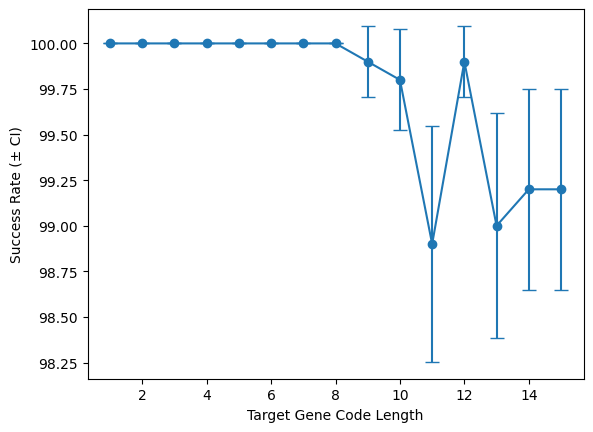

In [13]:

def GA_success_rate(population:int, target_gene_length:int, mut_p:int, confidence:float = 0.95, iterations:int = 1000, gen_cap:int = 100):
    target = [random.choice(genes) for _ in range(target_gene_length)]

    success = sum(genetic_algorithm(genes, target, N=population, max_gen=gen_cap, mutation_probability=mut_p) is not None for _ in range(iterations))
    p = success / iterations

    alpha = 1 - confidence
    z = norm.ppf(1 - alpha/2)
    margin = z * np.sqrt(p * (1 - p)/iterations)
    
    ci = (p - margin, p + margin)
    print(f"({population}, {target_gene_length}, {mut_p}%)\t--> {ci[0]*100:.2f}% - {ci[1]*100:.2f}%")
    return p, ci

genes  = 'ACGT'
pop = 10
tgcl = 5
mut_prob = 1
max_gen = 300

i = 1000
c = 0.95

X:list[int] = range(1, 16)

# 77.4⋅n−1.23
res = [GA_success_rate(population=pop, target_gene_length=x, mut_p=max(77.4*np.power(x, -1.23), 2), confidence=c, iterations=i, gen_cap=max_gen) for x in X]

p_hat = [p * 100 for p, _ in res]
errors = [(ci[1] - ci[0])/2*100 for _, ci in res]

plot.errorbar(X, p_hat, yerr=errors, fmt='o-', capsize=5)
plot.xlabel("Target Gene Code Length")
plot.ylabel("Success Rate (± CI)")